In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%config InlineBackend.figure_format = 'svg'

/Users/Ocean/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/Ocean/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Decision Tree for Classification

## Classification-tree CART
- sequence of if-else nodes on features
- **Objective**: infer class labels
- able to capture non-linear relationships between features and labels
- No requiring feature scaling (e.g. Standardisation)

## Example: breast cancer in 2D

```python
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# stratification of target ensures PROPORTIONATE split of labels between train and test dataset, saving imbalanced labels

dt = DecisionTreeClassifier(max_depth=2, random_state=1) # same as splitfunc

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy_score(y_test, y_pred)
```

## Decision Regions - feature space where all instances are assigned to one class
> #### important difference to Linear Model (e.g. logistic regression classifier) in which decision boundary is linear


## Contrast to LM
- a CART divides the feature space into RECT regions whereas LM a SINGLE LINE boundary, a binary decision 

## Building blocks
- #### Decision-Tree - data structure of hierarchy of nodes
- #### Nodes - question or prediction
  1. Root - parent node
  2. internal node
  3. leaf - one parent no children -> prediction
 > binary branching in this case
 
 ## Information GAIN
 - parent N samples [Question] f < split_point ?
    - True -> left N samples
    - False -> right N samples

#### $IG(feat., sp) = I(parent) - (\frac{N_{left}}{N} I(left) + \frac{N_{right}}{N} I(right))$

- criteria to measure IMPURITY of node I(node):
    1. gini index,
    2. entropy...
    
- ndoes are grown RECURSIVELY
- at node(i), split data based on:
    - feature f and split-point sp to **MAX IG(node)**
- if IG(node) = 0, declare node a leaf !!
- assuming unconstrained depth !!

> Most of the time, the gini index and entropy lead to the same results. The **gini index** is slightly faster to compute and is the default criterion used in the DecisionTreeClassifier model of scikit-learn.

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error as MSE


df_bike = pd.read_csv('Data_Folder/bikes.csv')
df_bike.head()

df_breast = pd.read_csv('Data_Folder/wbc.csv')
df_breast.head()

df_indian = pd.read_csv('Data_Folder/indian_liver_patient.csv')
df_indian.head()

df_indian_prep = pd.read_csv('Data_Folder/indian_liver_patient_preprocessed.csv', index_col=[0])
df_indian_prep.head()


,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [3]:
target_breast = pd.get_dummies(df_breast.loc[:,'diagnosis'],drop_first=True)
data_breast = df_breast.loc[:,('radius_mean','concave points_mean')]
target_breast = np.array(target_breast)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(data_breast, target_breast.reshape(-1,), test_size=0.2, random_state=42, stratify=target_breast)

In [5]:
dt_breast = DecisionTreeClassifier(max_depth=6, random_state=42)

dt_breast.fit(X_train, y_train)

y_pred_breast = dt_breast.predict(X_test)

acc = accuracy_score(y_test, y_pred_breast)
print('Test set accuracy: {:.5f}'.format(acc))

logreg_breast = LogisticRegression(random_state=42)
logreg_breast.fit(X_train, y_train)
logreg_breast_pred = logreg_breast.predict(X_test)
print('LogReg accuracy: {:.5f}'.format(accuracy_score(y_test, logreg_breast_pred)))


# second Tree

dt_breast1 = DecisionTreeClassifier(max_depth=8, min_samples_leaf=0.13, random_state=42)
dt_breast1.get_params()

dt_breast1.fit(X_train, y_train)
y_pred_breast1 = dt_breast1.predict(X_test)
mse_dt_breast = MSE(y_test, y_pred_breast1)
rmse_dt_breast = mse_dt_breast**(1/2)

print('Test set RMSE of dt-regressor: {:.5f}'.format(rmse_dt_breast))


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

Test set accuracy: 0.89474


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogReg accuracy: 0.86842


{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 0.13,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 42,
 'splitter': 'best'}

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.13, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

Test set RMSE of dt-regressor: 0.33769


In [6]:
from sklearn.model_selection import cross_val_score

MSE_CV_scores_breast = cross_val_score(dt_breast1, X_train, y_train, cv=10,
                                      scoring='neg_mean_squared_error',
                                       n_jobs=-1)

# minus result to get positive MSE

RMSE_CV_breast = (-MSE_CV_scores_breast.mean())**(1/2)

print('CV RMSE: {:.5f}'.format(RMSE_CV_breast))


y_pred_breast1_train = dt_breast1.predict(X_train)
RMSE_train = (MSE(y_train, y_pred_breast1_train))**(1/2)

print('Train RMSE: {:.5f}'.format(RMSE_train))



# notice training error is roughly equal to the 10-folds error obtained
# Though RMSE_Train and RMSE_CV similar, BUT actual value is 
# TOO LARGE for target range! Thus still UNDERFIT too constrained to capture nonlinear


CV RMSE: 0.30040
Train RMSE: 0.28128


## DT for Regression
- e.g. predicting cont 'mpg' by 6 features
- LM would not be able to capture non-linear relation
- using MSE as metric
- new param : min_samples_leaf = 0.1 
    * condition: minimum sample data 10% each leaf
- Criterion function:
    * $ I(node) = MSE(node) = \frac{1}{N_{node}}\sum_{i\in node}(y^{i} - \hat y_{node}^2)$
    * **optimum: MSE = 0, hence**
    * each leaf having mean $\hat y_{node} = \frac 1{N_{node}} \sum_{i\in node} y^{i} $
    * or $\hat y_{pred}(leaf) = \frac 1{N_{leaf}} \sum_{i \in leaf} y^i $



In [7]:
dt_breast_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)

dt_breast_entropy.fit(X_train, y_train)

breast_pred_entropy = dt_breast_entropy.predict(X_test)
breast_acc_entropy = accuracy_score(y_test, breast_pred_entropy)

print('Accuracy of Entropy criterion (2-feature)', breast_acc_entropy)



# again using al features
# Using all features and information criterion 'entropy'


df_breast = df_breast.drop(columns='Unnamed: 32')
data_breast = df_breast.iloc[:,2:]



dt_breast_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(data_breast, target_breast.reshape(-1,), test_size=0.2, stratify=target_breast, random_state=42)

dt_breast_entropy.fit(X_train, y_train)

breast_pred_entropy = dt_breast_entropy.predict(X_test)
breast_acc_entropy = accuracy_score(y_test, breast_pred_entropy)

print('Accuracy of Entropy criterion (2-feature)', breast_acc_entropy)



DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

Accuracy of Entropy criterion (2-feature) 0.8859649122807017


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

Accuracy of Entropy criterion (2-feature) 0.956140350877193


# BIAS-VARIANCE TRADEOFF

## Generalisation Error
- f(x) is unknown
- goal is to find $\hat y$ best approx. f
- $\hat y$ can be LogReg, DT, NN...
- Discard NOISE as possible
- END GAME: $\hat y$ achieve low **predictve error** on clean datasets
- OVERFITTING modelled func fits training set NOISE
    *. inflexible, missing underlying trend
- UNDERFITTING modelled func not flexible enough to approximate real f
    *. flexible to fit trend, but unfit or missing target a lot, high error

## Decomposition of Generalisation Error
$\hat f = bias^2 + variance + irreducible error$
### Model Complexity: sets the flexibility of $\hat f$
- Max_depth, Min_samples_leaf, hyperparam...
![Image](https://djsaunde.files.wordpress.com/2017/07/bias-variance-tradeoff.png)
![Image](https://sebastianraschka.com/images/blog/2016/model-evaluation-selection-part2/visual_bias_variance.png)
![Image](https://assets.datacamp.com/production/repositories/1796/datasets/e31eef728d0615f26d45238d80a0e1a5b4746e57/diagnose-problems.jpg)

## Diagnosis - estimating GE
- motif: how to estimate GE of a model?
    - Not Directly for lack of knowing f
    - and only one dataset
    - nor is ERROR known due to NOISE
- solution: holdout dataset
    - fit $\hat f$ to training set
    - eval ERROR of $\hat f$ on HOLDOUT
    - GE estimate = error of $\hat f$

### Cross-Validation 
- intact function -> CV
- K-FOLD or HOLD-OUT
![Image](https://i.stack.imgur.com/FKKvG.png)
    - e.g. 10-fold -> mean of 10 errors or CV error of $\hat f$
    - if CV error > training set error -> $\hat f$ OVERFIT 
      - reduce complexity (lower max_depth and/or higher min_samples per leaf)
      - gather more data

- If $\hat f$ suffers from HIGH BIAS:
  - CV error $\approx$ training error BUT much > desired error
  - opposite solution to OVERFIT
  - gather more relevant FEATURES

> NOTE: CV function does not allow setting MSE directly, hence ```scoring = 'neg_mean_squared_error', n_jobs = -1``` the latter for CPU molding



## ENSEMBLE Learning
- Pros of CART
    - simple to grasp
    - simple to interpret
    - easy to use
    - flexible to describe nonlinear dependencies
    - Simple PREPROC to standardise or normlised features
- BUT
    - classification only produces ORTHOGONAL decision boundaries (rectangular space)
    - sensitive to small variations in training set
    - High variance in unconstrained leading to OVERFITTING
- Solution: Ensemble

## Procedure
- train different models on same dataset
- let each model make its predictions
- meta-model: aggregates predicitons of individual models
- final prediction: more robust and less prone to errors
- best results: models are skillful in different ways, compensating each other's error
![Image](https://data-science-blog.com/wp-content/uploads/2017/12/ensemble-learning-prediction.png)
![Image](https://data-science-blog.com/wp-content/uploads/2017/12/ensemble-learning-stacking.png)

### Voting Classifier
- say Binary classification task
- N classifiers pred $P_1...P_n for P_i\in [0,1]$
- Meta-model pred: HARD voting
    - e.g. [1, 0, 1], then vote [1]



In [84]:
from sklearn.neighbors import KNeighborsClassifier as KNN

lr = LogisticRegression(random_state=42)
knn = KNN(n_neighbors=27)
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=42)

classifiers = [('Logistic Regression', lr),
              ('K Nearest Neighbors', knn),
              ('Classification Tree', dt)]

for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print('{:s} : {:.3f}'.format(clf_name, accuracy))




LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Logistic Regression : 0.939


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=27, p=2,
           weights='uniform')

K Nearest Neighbors : 0.921


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.13, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

Classification Tree : 0.877


In [85]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=classifiers)

vc.fit(X_train, y_train)

breast_pred_vc = vc.predict(X_test)

print('Voting Classifier: {:.5f}'.format(accuracy_score(y_test, breast_pred_vc)))


VotingClassifier(estimators=[('Logistic Regression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)),...        min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

Voting Classifier: 0.92105


/Users/Ocean/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Bagging or Bootstrap Aggregation
- Voting Classifier
- same training set
- obtained by majority voting
- many algorithms
- ONE algorithm
- $\ne$ subsets of training set
- different subset of dataset each time
- BOOSTRAP AGGREGATION (bagging)
- magic: reduce variance on each model in the ensemble
    - bootstrapping essentially = replaced random sampling
    - bootstrapping N samples from TRAINING
    - Each sample passed onto a Model (N)
    - ONE Algorithm (same)
- Final Bagging depending on problem
    - Classification: aggregates pred by majoriting voting ```BaggingClassifier```
    - Regression: by mean ```BaggingRegressor```
    - e.g. ```BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1)```
    

In [87]:
from sklearn.ensemble import BaggingClassifier

dt = DecisionTreeClassifier(random_state=1)

bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=42)

bc.fit(X_train, y_train)

y_pred = bc.predict(X_test)

print('Test set accuracy of bc: {:.5f}'.format(accuracy_score(y_test, y_pred)))


# possible to Bag or boostrap ensemble model ??

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=50, n_jobs=1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

Test set accuracy of bc: 0.97368


## Out of Bag Evaluation
- some instances may be sampled several times for one model
- while other instances may not be sampled at all
- Out of Bag (OOB) instances : mean 63% of trainiing instances are sampled, OOB = 37%
- SO used as test in place of CV
- OOB Evaluation
![Image](https://www.researchgate.net/profile/Minas_Liarokapis/publication/236230903/figure/fig4/AS:613866337751062@1523368548604/Random-Forests-based-classification-procedure-for-N-trees-grown-OOB-stands-for.ppm)


In [88]:
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=42)

bc = BaggingClassifier(base_estimator=dt,
                      n_estimators=50,
                      oob_score=True,
                      random_state=42)

bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)

print('Test set accuracy: {:.5f}, OOB accuracy: {:.5f}'.format(accuracy_score(y_test,y_pred), bc.oob_score_))


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=50, n_jobs=1, oob_score=True,
         random_state=42, verbose=0, warm_start=False)

Test set accuracy: 0.96491, OOB accuracy: 0.93846


## Random Forest: Another ENSEMBLE Learning
- recall **Bagging is f(base estimator, bootstrap_sample, all_features_used)**
- RF is BaseEstimator = Decision Tree
- Each estimator is trained on different boostrap sample having **SAME SIZE as training set**
- RANDOMISED training of individual trees
- d features are sampled at each node WITHOUT replacement **(d < total features)**
- Final META-MODEL depends on nature
![Image](https://s3.amazonaws.com/cdn.freshdesk.com/data/helpdesk/attachments/production/6018025962/original/RF.png?1458020765)
- ```RandomForestClassifier``` majority voting
- ```RandomForestRegressor``` average of best estimators' prediction

### Feature Importance
- tree-based model: enable measuring importance of each feature in prediction
- in Scikit Learn:
    - 'how much the tree nodes use a feature(i) (weighted average) to reduce IMPURITY'
    - accessing by attr ```.feature_importance_```
- pandas visualisation 
```python
key_feat_rf = pd.Series(rf.feature_importance_, index=X.columns)
sorted_key_rf = key_feat_rf.sort_values()
sorted_key_rf.plot(kind='barh', color='lightgreen'); plt.show();
```


In [90]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=25, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print('Test set RMSE of RandomForestRegressor: {:.5f}'.format(MSE(y_test,y_pred)**(1/2)))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

Test set RMSE of RandomForestRegressor: 0.18391


Text(0.5,1,'Features of Importance')

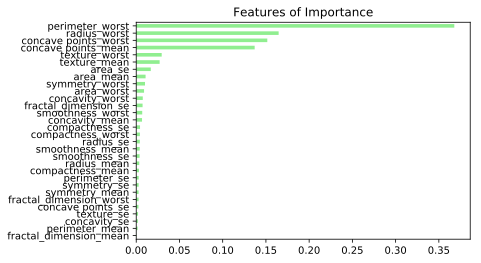

In [93]:
# features of importance
from sklearn.metrics import roc_auc_score


importances = pd.Series(data=rf.feature_importances_, index=X_train.columns)

importances_sorted = importances.sort_values()

importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features of Importance')
plt.show()

## AdaBoost
- Boosting: ensemble method combining several **weak learners** to form a strong learner
- Weak learner: model doing slightly better than random guessing
- e.g. **Decision stump (CART whose maximum depth = 1)**

### Steps
- train ensemble of predictors sequentially
- each predictor tries to correct its predecessor
    - AdaBoost - adaptive, each predictor leans on instances wrongly predicted by its predecessor
        - achieved by changing WEIGHTS of training instances
        - each predictor assigned a coeff alpha
        - alpha depends on the predictor's training error
        - **tradeoff: learning_rate VS. # estimators** recall NN hyperparam, low learn_rate be compensated by more estimators, LOOPs or cycle in NN
        - ```AdaBoostClassifer or AdaBoostRegressor``` by weighted_maority_voting or weighted_average
        - **note CART is often used as estimator due to its HIGH VARIANCE** room for gauging??

## Gradient Boosting (GB)
- still sequential correction of predecessor's error
- BUT does not change weights on training instances
- Instead, FIT each predictor is trained using predecessor's RESIDUAL ERROR as LABELS
    - first tree/estimator $(X, y) train_{predict} => r_1 = y_1 - \hat y_1$
    - rest of trees using Residual error as label $(X, lr*r_1) -> r_2 = r_1 - \hat r_1$
    - shrinkage follows the same tradeoff of learn_rate and loops
- Regression: 
$y_{pred} = y_1 + lr*r_1 + ... lr*r_n$
```GradientBoostingRegressor```
- Classification ```GradientBoostClassifier```



In [94]:
from sklearn.ensemble import AdaBoostClassifier



dt = DecisionTreeClassifier(max_depth=2, random_state=42)

ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=42)

ada.fit(X_train, y_train)

y_pred_proba = ada.predict_proba(X_test)[:,1]

print('ROC AUC score: {:.5f}'.format(roc_auc_score(y_test, y_pred_proba)))


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
          learning_rate=1.0, n_estimators=180, random_state=42)

ROC AUC score: 0.99107


## Stochastic Gradient Boosting (SGB)
- motif: GB invovles an exhaustive search procedure
- each CART trained to find the best split points and features
- may lead to CARTs using the same split points and maybe the same features
- mitigation: stochastic, or random subset without replacement
- sampled instances (40%-80% of training set) are sampled without replacement
- features are sampled (sans repl) when choosing split points
- **result: DIVERSITY and VARIANCE to trees**
    - sample instance = $(X_{sampled}, y_{sampled})$ 
    - EACH SPLIT/NODE, feature_sampled used
    - $ r_1 = y_1 - \hat y_1$
    - looping to N estimators






In [96]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(max_depth=4, n_estimators=200, random_state=42)

gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

print("Test set RMSE of GradientBoostingRegressor: {:.5f}".format(MSE(y_test,y_pred)**(1/2)))


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

Test set RMSE of GradientBoostingRegressor: 0.21851


In [97]:
# Stochastic GBR

sgbr = GradientBoostingRegressor(max_depth=4, subsample=0.9, max_features=0.75, n_estimators=200, random_state=42)

sgbr.fit(X_train, y_train)
y_pred = sgbr.predict(X_test)

print("Test set RMSE of Stochastic GradientBoosting: {:.5f}".format(MSE(y_test, y_pred)**(1/2)))


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=0.75,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=42,
             subsample=0.9, verbose=0, warm_start=False)

Test set RMSE of Stochastic GradientBoosting: 0.17485


## Tuning CART's HyperParameters (KEY)
- **param** learned from training, CART e.g. split-point at node, split-feature at node
- **hyperParam** a priori specification, e.g. CART max_depth, min_samples_leaf, splitting criterion...etc (tuning art)
- motif: optimal tuning
- solution: find a set of optimal hyperparams resulting in an optimal model
- optimal model: yielding optimal score
- score: default accuracy_score (classification) and MSE (regression)
- CV used to estimate Generalisation Performance
- approaches: **GridSearch, RandomSearch, BayesianOptimisation, Genetic Algorithms...**
    - GridSearch recap:
    - manually set grid of discrete hyperparam val
    - set a metric for scoring 
    - exhaustive search thru grid
    - for each set of hyperparam, eval CV scores
    - optimum: best CV score
    - **BEWARE: dimentionality and computing efficacy**



In [101]:
params_dt = {'max_depth':[2,3,4],
    'min_samples_leaf':[0.12,0.14,0.16,0.18]
}

dt =DecisionTreeClassifier(random_state=42)

from sklearn.model_selection import GridSearchCV

grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

grid_dt.fit(X_train, y_train)

best_model = grid_dt.best_estimator_

y_pred_proba = grid_dt.predict_proba(X_test)[:,1]

print('Test set ROC AUC score: {:.5f}'.format(roc_auc_score(y_test, y_pred_proba)))



GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4], 'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

Test set ROC AUC score: 0.97553


## Tuning RF's HyperParams
- CART hyperParams remains
- comuptationally expensive
- weight the impact of tuning on the whole project
- 

In [105]:
params_rf = {
    'n_estimators':[100,350,500],
    'max_features':['log2','auto','sqrt'],
    'min_samples_leaf':[2,10,30]
}


# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)


grid_rf.fit(X_train, y_train)

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(MSE(y_test, y_pred)**(1/2))) 

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   20.7s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 350, 500], 'max_features': ['log2', 'auto', 'sqrt'], 'min_samples_leaf': [2, 10, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

Test RMSE of best model: 0.179


# XGBoosting
## Nature of SL - Classification and Regression
- Binary or Multi-class outcomes or labels
- AUC ROC most versatile and common **simply the proba a random datapoint has higher rank than a random negative data point**
- Accuracy score is commonly used frm Confusion Matrix
### Ranking and Recommendation Problem

## XGBoost hot library or module
- originally C++
- parallelisable harnessing computing power
- Core algorithm able on cloud computing
### KEY: consistently out-perform other models (Kaggle)

```python
# Import xgboost
import xgboost as xgb

# Create arrays for the features and the target: X, y
X, y = churn_data.iloc[:,:-1], churn_data.iloc[:,-1]

# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))
```

## Tree as stump or base model
- CART is used in XGBoosting for its node spliting value effectiveness ?!

In [11]:

# Instantiate the classifier: dt_clf_4
dt_clf_4 = DecisionTreeClassifier(max_depth=4)

# Fit the classifier to the training set
dt_clf_4.fit(X_train, y_train)

# Predict the labels of the test set: y_pred_4
y_pred_4 = dt_clf_4.predict(X_test)

# Compute the accuracy of the predictions: accuracy
accuracy = float(np.sum(y_pred_4==y_test))/y_test.shape[0]
print("accuracy:", accuracy)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

accuracy: 0.9035087719298246


# BOOSTING - Core: 'meta-algorithm' 
- used on 'weak learners' to boost
- Iteration on subsets of data
- weighing each weak prediction selon to performance
- Combine the weighted predictions to obtain a sinlge weighted prediction

```python
# Create the DMatrix: churn_dmatrix
churn_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:logistic", "max_depth":3}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, nfold=3, num_boost_round=5, metrics="error", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the accuracy
print(((1-cv_results["test-error-mean"]).iloc[-1]))


# Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, nfold=3, num_boost_round=5, metrics="auc", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])
```


# Eligibility of XGBoost
- large of samples ( > 1000 and few 100 features )
- Mixture of cat or num / only num features 
- Not for Image, Vision, NLP - which are better for Deep Learning


## XGBoost in Regression
- real numbers
- Trees are surtout fit for XGB due to their ability on Cat/Num features spliting

# Loss Func and BASE model
- Loss or Objective, minisation of difference across all data point
- Loss in XGB = reg:linear / reg:logistic / binary:logistic
- Ensemble method of additive effect
- **Base learners when combined creating final pred NON-LINEAR**
- **Each BASE should be GOOD at pred various parts of Dataset !!!**
- **Base: Tree and Linear**


In [21]:
df_housing = pd.read_csv('Data_Folder/ames_housing_trimmed_processed.csv')
df_housing.head()

data_housing = df_housing.iloc[:,:-1]
target_housing = df_housing.iloc[:,-1]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,Remodeled,GrLivArea,BsmtFullBath,BsmtHalfBath,...,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,PavedDrive_P,PavedDrive_Y,SalePrice
0,60,65.0,8450,7,5,2003,0,1710,1,0,...,0,0,0,0,1,0,0,0,1,208500
1,20,80.0,9600,6,8,1976,0,1262,0,1,...,0,1,0,0,0,0,0,0,1,181500
2,60,68.0,11250,7,5,2001,1,1786,1,0,...,0,0,0,0,1,0,0,0,1,223500
3,70,60.0,9550,7,5,1915,1,1717,1,0,...,0,0,0,0,1,0,0,0,1,140000
4,60,84.0,14260,8,5,2000,0,2198,1,0,...,0,0,0,0,1,0,0,0,1,250000


In [27]:
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(data_housing, target_housing, test_size=0.2, random_state=123)

xg_reg = xgb.XGBRegressor(objective='reg:linear', seed=123)

xg_reg.fit(X_train, y_train)

preds = xg_reg.predict(X_test)

rmse = np.sqrt(MSE(y_test, preds))
print("RMSE: %f" % (rmse))


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
       silent=True, subsample=1)

RMSE: 22773.438540


In [29]:
# using xbg own training API
# Now that you've used trees as base models in XGBoost, 
# let's use the other kind of base model that can be used with XGBoost - 
# a linear learner. This model, although not as commonly used in XGBoost, 
# allows you to create a regularized linear regression using XGBoost's powerful learning API. 
# However, because it's uncommon, you have to use XGBoost's own 
# non-scikit-learn compatible functions to build the model, such as xgb.train()

DM_train = xgb.DMatrix(X_train, y_train)
DM_test = xgb.DMatrix(X_test, y_test)

params = {"booster":"gblinear", "objective":"reg:linear"}

xg_reg = xgb.train(params = params, dtrain=DM_train, num_boost_round=5)

preds = xg_reg.predict(DM_test)

rmse = np.sqrt(MSE(y_test,preds))
print("RMSE: %f" % (rmse))

RMSE: 44331.645061


In [30]:
# Eval via CV

housing_dmatrix = xgb.DMatrix(data=data_housing, label=target_housing)

params = {"objective":"reg:linear", "max_depth":4}

cv_results = xgb.cv(dtrain=housing_dmatrix, 
                    params=params, 
                    nfold=4, 
                    num_boost_round=5, 
                    metrics='rmse', 
                    as_pandas=True, 
                    seed=123)

print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

# can also change rmse to mae 

[19:09:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[19:09:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[19:09:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[19:09:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[19:09:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:09:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:09:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:09:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:09:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

## Regularisation in XGBoost - penalising complexity
- **Accuracy in simplicity**
- ### **GAMMA** minimum loss reduction allowed for split to occur !!
- ### **ALPHA L1** on **leaf weights plutôt features weights!**
- ### **LAMBDA L2** less spiky, smoothing control on **leaf weight** than L1

In [31]:
reg_params = [1, 10, 100]

params = {"objective":"reg:linear","max_depth":3}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

for reg in reg_params:

    params["lambda"] = reg
    
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2","rmse"]))

[19:16:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[19:16:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:16:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:16:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:16:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:16:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:16:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:16:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:16:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_

[19:17:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:17:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:17:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:17:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:17:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:17:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:17:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:17:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:17:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[

ImportError: You must install graphviz to plot tree

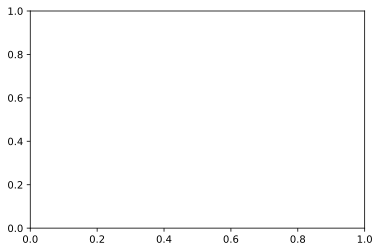

In [32]:
params = {"objective":"reg:linear", "max_depth":2}

xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the first tree
xgb.plot_tree(xg_reg, num_trees=0)
plt.show()

# Plot the fifth tree
xgb.plot_tree(xg_reg, num_trees=4)
plt.show()

# Plot the last tree sideways
xgb.plot_tree(xg_reg, num_trees=9, rankdir='LR')
plt.show()

They provide insight into how the model arrived at its final decisions and what splits it made to arrive at those decisions. This allows us to identify which features are the most important in determining house price. In the next exercise, you'll learn another way of visualizing feature importances.

[19:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[19:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:19:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

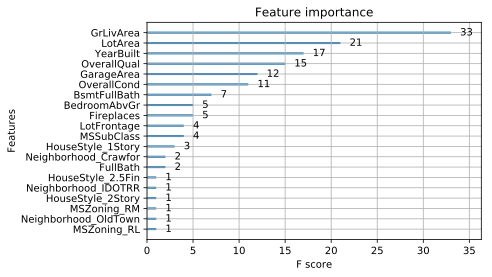

In [34]:
params = {"objective":"reg:linear", "max_depth":4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()

## XGBoost Tuning 

In [35]:
params = {"objective":"reg:linear", "max_depth":3}

# Create list of number of boosting rounds
num_rounds = [5, 10, 15]

# Empty list to store final round rmse per XGBoost model
final_rmse_per_round = []

for curr_num_rounds in num_rounds:

    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, num_boost_round=curr_num_rounds, metrics="rmse", as_pandas=True, seed=123)
    
    # Append final round RMSE
    final_rmse_per_round.append(cv_results["test-rmse-mean"].tail().values[-1])


num_rounds_rmses = list(zip(num_rounds, final_rmse_per_round))
print(pd.DataFrame(num_rounds_rmses,columns=["num_boosting_rounds","rmse"]))

[19:22:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:22:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:22:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:22:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:22:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:22:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:22:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:22:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:22:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_

In [36]:
# early-stopping to cut short on insignificant improvement

cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, num_boost_round=50, early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

[19:24:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:24:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:24:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:24:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:24:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:24:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:24:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:24:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:24:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_

## HyperParam
#### Tree
- Vary for different base learner
- learning rate / gamma / L2 / L1 / max_depth / subsample / colsample_bytree (feature sample) 
    - max_depth refers to the maximum depth allowed to each tree in the ensemble. If this parameter is bigger, the trees tend to be more complex, and will usually overfit faster (all other things being equal).
    - eta is our learning rate. As I said earlier, it will multiply the output of each tree before fitting the next one, and also the sum when doing predictions afterwards. When set to 1, the default value, it does nothing. If set to a smaller number, the model will take longer to converge, but will usually fit the data better (potentially overfitting). It behaves similarly to a Neural Network’s learning rate.
    - colsample_bytree refers to how many of the columns will be available to each tree when generating the branches. Its default value is 1, meaning “all of them”. Potentially, we may want to set it to a lower value, so that all of the trees can’t just use the best feature over and over. This way, the model becomes more robust to changes in the data distribution, and also overfits less.
    - num_rounds refers to the number of training rounds: instances where we check whether to add a new tree. The training will also stop if the target function hasn’t improved in many iterations.

#### Linaer
- L2, L1, (on weights) / L2-bias

In [37]:
# Create list of eta values and empty list to store final round rmse per xgboost model
eta_vals = [0.001, 0.01, 0.1]
best_rmse = []

# Systematically vary the eta
for curr_val in eta_vals:

    params["eta"] = curr_val
    
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3,
                        num_boost_round=10, early_stopping_rounds=5,
                        metrics="rmse", as_pandas=True, seed=123)
    
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

print(pd.DataFrame(list(zip(eta_vals, best_rmse)), columns=["eta","best_rmse"]))

[19:27:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:27:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:27:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:27:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:27:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:27:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:27:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:27:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:27:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_

In [38]:
params = {"objective":"reg:linear"}

# Create list of max_depth values
max_depths = [2, 5, 10, 20]
best_rmse = []

for curr_val in max_depths:

    params["max_depth"] = curr_val
    
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2,
                 num_boost_round=10, early_stopping_rounds=5,
                 metrics="rmse", as_pandas=True, seed=123)
    
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

print(pd.DataFrame(list(zip(max_depths, best_rmse)),columns=["max_depth","best_rmse"]))

[19:28:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:28:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:28:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:28:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:28:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:28:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:28:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:28:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:28:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[

### Colsample_bytree

```python
# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params={"objective":"reg:linear","max_depth":3}

# Create list of hyperparameter values
colsample_bytree_vals = [0.1, 0.5, 0.8, 1]
best_rmse = []

# Systematically vary the hyperparameter value 
for curr_val in colsample_bytree_vals:

    params["colsample_bytree"] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2,
                 num_boost_round=10, early_stopping_rounds=5,
                 metrics="rmse", as_pandas=True, seed=123)
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(colsample_bytree_vals, best_rmse)), columns=["colsample_bytree","best_rmse"]))
```

### GridSearch tuning

```python
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'n_estimators': [50],
    'max_depth': [2, 5]
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor()

# Perform grid search: grid_mse
grid_mse = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid,
                        scoring='neg_mean_squared_error', cv=4, verbose=1)
grid_mse.fit(X, y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))
```

### Mini-batch Grid

```python
# Create the parameter grid: gbm_param_grid 
gbm_param_grid = {
    'n_estimators': [25],
    'max_depth': range(2, 12)
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor(n_estimators=10)

# Perform random search: grid_mse
randomized_mse = RandomizedSearchCV(estimator=gbm, param_distributions=gbm_param_grid,
                                    n_iter=5, scoring='neg_mean_squared_error', cv=4, verbose=1)
randomized_mse.fit(X, y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ",randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))
```

### Limitation
- Grid suffer from computational efficacy
- RandomGrid en revanche souffire Parameter space is massive + random 'best' waiting time

## Pipeline + Preprocessing

```python
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Fill missing values with 0
df.LotFrontage = df.LotFrontage.fillna(0)

# Create a boolean mask for categorical columns
categorical_mask = (df.dtypes == object)

# Get list of categorical column names
categorical_columns = df.columns[categorical_mask].tolist()

# Print the head of the categorical columns
print(df[categorical_columns].head())

# Create LabelEncoder object: le
le = LabelEncoder()

# Apply LabelEncoder to categorical columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: le.fit_transform(x))

# Print the head of the LabelEncoded categorical columns
print(df[categorical_columns].head())
```

#### Encoding CAT: OneHotEncoder

```python
# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Create OneHotEncoder: ohe
ohe = OneHotEncoder(categorical_features=categorical_mask, sparse=False)

# Apply OneHotEncoder to categorical columns - output is no longer a dataframe: df_encoded
df_encoded = ohe.fit_transform(df)

# Print first 5 rows of the resulting dataset - again, this will no longer be a pandas dataframe
print(df_encoded[:5, :])

# Print the shape of the original DataFrame
print(df.shape)

# Print the shape of the transformed array
print(df_encoded.shape)
```

#### DictVectoriser - label + one-hot ensemble

```python
# Import DictVectorizer
from sklearn.feature_extraction import DictVectorizer

# Convert df into a dictionary: df_dict
df_dict = df.to_dict("records")

# Create the DictVectorizer object: dv
dv = DictVectorizer(sparse=False)

# Apply dv on df: df_encoded
df_encoded = dv.fit_transform(df_dict)

# Print the resulting first five rows
print(df_encoded[:5,:])

# Print the vocabulary
print(dv.vocabulary_)
```

#### Pipelining

```python
# Import necessary modules
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline

# Fill LotFrontage missing values with 0
X.LotFrontage = X.LotFrontage.fillna(0)

# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", xgb.XGBRegressor())]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)

# Fit the pipeline
xgb_pipeline.fit(X.to_dict("records"), y)
```

```python
# Import necessary modules
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Fill LotFrontage missing values with 0
X.LotFrontage = X.LotFrontage.fillna(0)

# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", xgb.XGBRegressor(max_depth=2, objective="reg:linear"))]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)

# Cross-validate the model
cross_val_scores = cross_val_score(xgb_pipeline, X.to_dict("records"), y, cv=10, scoring="neg_mean_squared_error")

# Print the 10-fold RMSE
print("10-fold RMSE: ", np.mean(np.sqrt(np.abs(cross_val_scores))))
```

```python
# Import necessary modules
from sklearn_pandas import DataFrameMapper
from sklearn_pandas import CategoricalImputer

# Check number of nulls in each feature column
nulls_per_column = X.isnull().sum()
print(nulls_per_column)

# Create a boolean mask for categorical columns
categorical_feature_mask = X.dtypes == object

# Get list of categorical column names
categorical_columns = X.columns[categorical_feature_mask].tolist()

# Get list of non-categorical column names
non_categorical_columns = X.columns[~categorical_feature_mask].tolist()

# Apply numeric imputer
numeric_imputation_mapper = DataFrameMapper(
                                            [([numeric_feature],Imputer(strategy="median")) for numeric_feature in non_categorical_columns],
                                            input_df=True,
                                            df_out=True
                                           )

# Apply categorical imputer
categorical_imputation_mapper = DataFrameMapper(
                                                [(category_feature, CategoricalImputer()) for category_feature in categorical_columns],
                                                input_df=True,
                                                df_out=True
                                               )

```

```python
# Import FeatureUnion
from sklearn.pipeline import FeatureUnion

# Combine the numeric and categorical transformations
numeric_categorical_union = FeatureUnion([
                                          ("num_mapper", numeric_imputation_mapper),
                                          ("cat_mapper", categorical_imputation_mapper)
                                         ])

```

```python
# Create full pipeline
pipeline = Pipeline([
                     ("featureunion", numeric_categorical_union),
                     ("dictifier", Dictifier()),
                     ("vectorizer", DictVectorizer(sort=False)),
                     ("clf", xgb.XGBClassifier(max_depth=3))
                    ])

# Perform cross-validation
cross_val_scores = cross_val_score(pipeline, kidney_data, y, scoring="roc_auc", cv=3)

# Print avg. AUC
print("3-fold AUC: ", np.mean(cross_val_scores))
```

```python
# Create the parameter grid
gbm_param_grid = {
    'clf__learning_rate': np.arange(.05, 1, .05),
    'clf__max_depth': np.arange(3,10, 1),
    'clf__n_estimators': np.arange(50, 200, 50)
}

# Perform RandomizedSearchCV
randomized_roc_auc = RandomizedSearchCV(estimator=pipeline,
                                        param_distributions=gbm_param_grid,
                                        n_iter=2, scoring='roc_auc', cv=2, verbose=1)

# Fit the estimator
randomized_roc_auc.fit(X, y)

# Compute metrics
print(randomized_roc_auc.best_score_)
print(randomized_roc_auc.best_estimator_)
```